# FashionMNIST 신경망

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
device = "cuda" if torch.cuda.is_available else "cpu"
# print(device)

In [13]:
# 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [14]:
# 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # 입력층
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),  # Layer1
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),  # Layer2
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10)  # 출력층
        )

    def forward(self, x):
        out = self.flatten(x)
        out = self.linear_relu_stack(out)
        return out


model = NeuralNetwork()
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [15]:
# 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
# 가중치 업데이트
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10


for epoch in range(epochs):
    size = len(train_dataloader.dataset)
    print(f"epoch{epoch+1}------------------------")
    for batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            current = batch*len(x)
            print(f"loss : {loss:.4f}, [{current} / {size}]")

    test_size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            test_loss += loss_fn(outputs, y).item()
            correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= test_size

    print(f"Accuracy : {100*correct:.4f}, Avg loss : {test_loss}")

epoch1------------------------
loss : 2.3965, [0 / 60000]
loss : 0.5687, [6400 / 60000]
loss : 0.4078, [12800 / 60000]
loss : 0.5230, [19200 / 60000]
loss : 0.4481, [25600 / 60000]
loss : 0.4045, [32000 / 60000]
loss : 0.3062, [38400 / 60000]
loss : 0.4556, [44800 / 60000]
loss : 0.4077, [51200 / 60000]
loss : 0.4182, [57600 / 60000]
Accuracy : 84.9900, Avg loss : 0.4043774982546545
epoch2------------------------
loss : 0.3325, [0 / 60000]
loss : 0.3442, [6400 / 60000]
loss : 0.2660, [12800 / 60000]
loss : 0.3286, [19200 / 60000]
loss : 0.3253, [25600 / 60000]
loss : 0.3038, [32000 / 60000]
loss : 0.2452, [38400 / 60000]
loss : 0.3764, [44800 / 60000]
loss : 0.3233, [51200 / 60000]
loss : 0.3405, [57600 / 60000]
Accuracy : 86.0300, Avg loss : 0.3785134830102799
epoch3------------------------
loss : 0.2473, [0 / 60000]
loss : 0.3219, [6400 / 60000]
loss : 0.2210, [12800 / 60000]
loss : 0.2582, [19200 / 60000]
loss : 0.2883, [25600 / 60000]
loss : 0.2694, [32000 / 60000]
loss : 0.2273, [

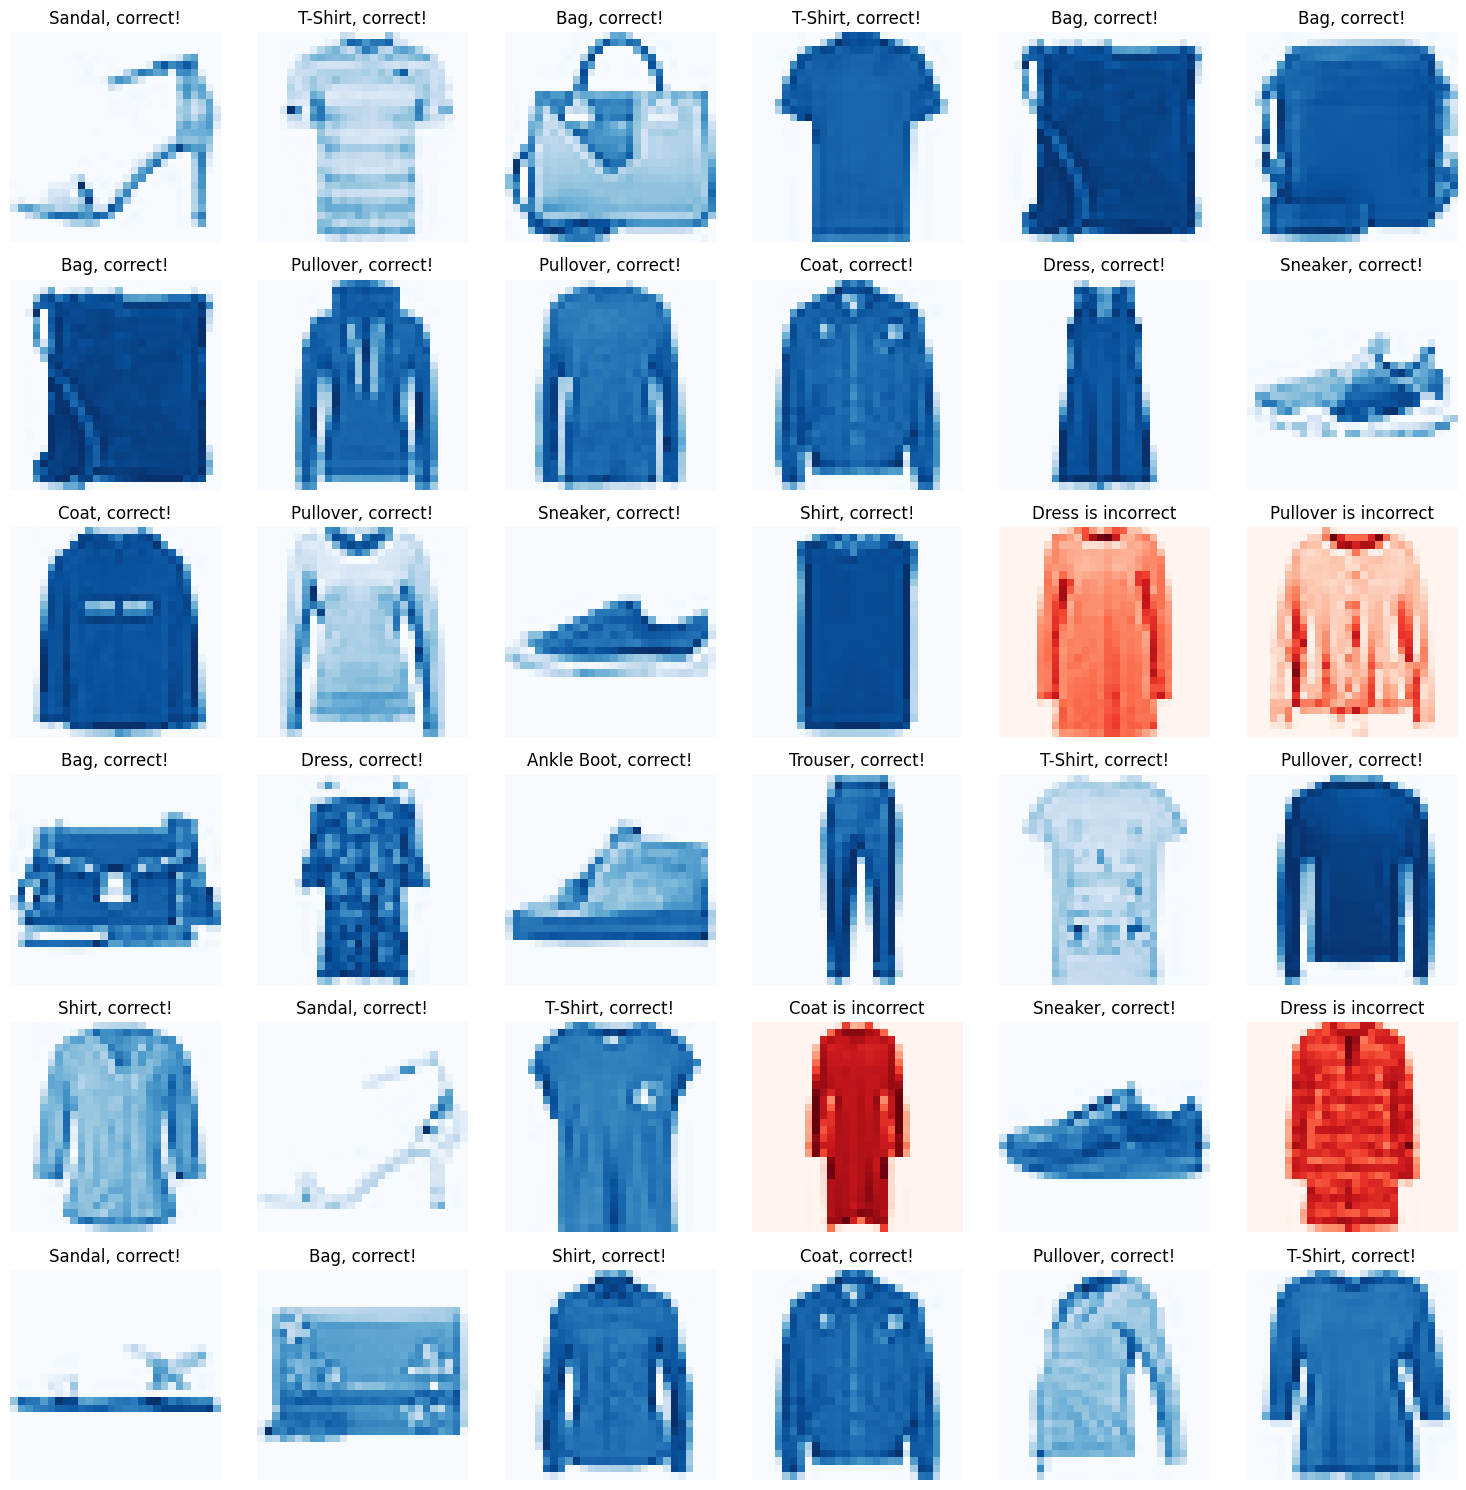

In [10]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15, 15))
model.eval()  # 모델을 평가모드로 변경

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].to(device)
    label = test_data[data_idx][1]

    with torch.no_grad():
        outputs = model(input_img)
        _, prediction = torch.max(outputs, 1)
        pred_class = label_tags[prediction.item()]
        true_class = label_tags[label]

    title = f"{pred_class}, correct!" if pred_class == true_class else f"{
        pred_class} is incorrect"
    cmap = "Blues" if pred_class == true_class else "Reds"

    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy()
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()